<a href="https://colab.research.google.com/github/Anshita0506/Election_AD_Spend/blob/main/ElectionADs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELECTION AD SPEND ANALYSIS

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# VISUAL STYLE
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 12

In [3]:
# LOAD DATASETS
results = pd.read_csv('results.csv')
advertisers = pd.read_csv('advertisers.csv')
locations = pd.read_csv('locations.csv')

In [4]:
locations.rename(columns={"Location name":"PC_Name"}, inplace=True)

In [5]:
print("Results columns:", results.columns.tolist())
print("Advertisers columns:", advertisers.columns.tolist())
print("Locations columns:", locations.columns.tolist())

Results columns: ['_id', 'Sl No', 'State', 'PC_Name', 'Total Electors', 'Polled (%)', 'Total Votes', 'Phase']
Advertisers columns: ['Page ID', 'Page name', 'Disclaimer', 'Amount spent (INR)', 'Number of ads in Library']
Locations columns: ['PC_Name', 'Amount spent (INR)']


In [6]:
# CLEAN & PREP DATA
results['PC_Name'] = results['PC_Name'].str.strip().str.lower()
locations['PC_Name'] = locations['PC_Name'].str.strip().str.lower()
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce').fillna(0)
results['Phase'] = results['Phase'].astype(float)

In [7]:
# HANDLE MISSING STATE/PHASE DATA
results = results.dropna(subset=['Phase', 'State'])

In [8]:
# MERGE DATASETS
merged = pd.merge(results, locations, on='PC_Name', how='left')
merged['Amount spent (INR)'] = merged['Amount spent (INR)'].fillna(0)

In [9]:
# CORRELATION ANALYSIS
correlation = merged[['Amount spent (INR)', 'Polled (%)', 'Total Votes']].corr()


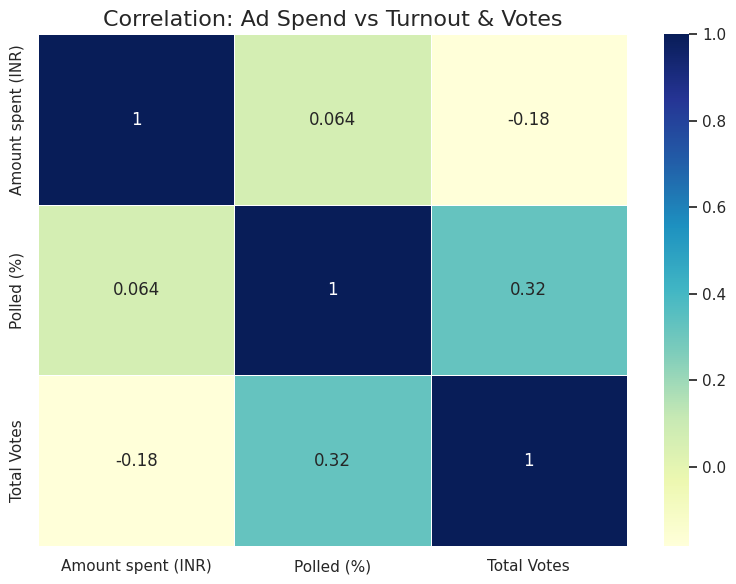

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation: Ad Spend vs Turnout & Votes')
plt.tight_layout()
plt.show()

In [11]:
# TOP 10 ADVERTISERS
top_advertisers = advertisers.groupby('Page name')['Amount spent (INR)'].sum().reset_index()
top_advertisers = top_advertisers.sort_values('Amount spent (INR)', ascending=False).head(10)
print("Top 10 Advertisers by Ad Spend:")
display(top_advertisers)

Top 10 Advertisers by Ad Spend:


,Page name,Amount spent (INR)
2250,Bharatiya Janata Party (BJP),193854342.0
834,Ama Chinha Sankha Chinha,112412941.0
5893,Indian National Congress,108787100.0
4433,Ellorum Nammudan,23806041.0
1854,BJP Odisha,19573782.0
3138,Crafto,16955973.0
9823,Phir Ek Baar Modi Sarkar,16358104.0
795,All India Trinamool Congress,15151000.0
8592,MyGovIndia,14202725.0
16065,discovery+,13408908.0


In [13]:
party_spend = advertisers.groupby('Disclaimer')['Amount spent (INR)'].sum().reset_index()
party_spend = party_spend.sort_values('Amount spent (INR)', ascending=False).head(10)

<ipython-input-14-a4045bc88d43>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=party_spend, x='Amount spent (INR)', y='Disclaimer', palette='magma')


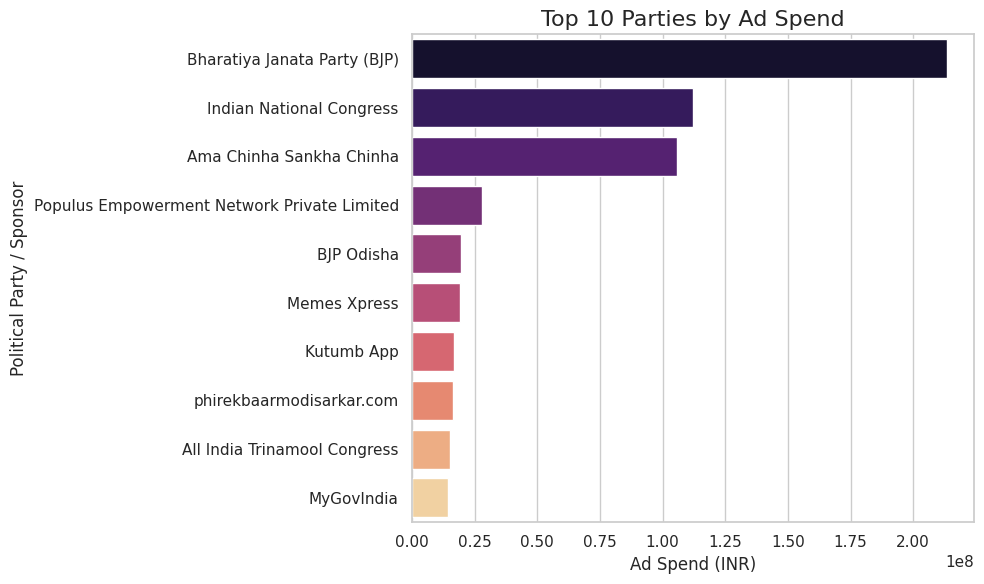

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=party_spend, x='Amount spent (INR)', y='Disclaimer', palette='magma')
plt.title("Top 10 Parties by Ad Spend")
plt.xlabel("Ad Spend (INR)")
plt.ylabel("Political Party / Sponsor")
plt.tight_layout()
plt.show()

In [15]:
# STATE-LEVEL ANALYSIS
state_analysis = merged.groupby('State').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean',
    'Total Votes': 'sum'
}).reset_index()

print("State-wise Summary:")
display(state_analysis.sort_values('Amount spent (INR)', ascending=False))

State-wise Summary:


,State,Amount spent (INR),Polled (%),Total Votes
26,Sikkim,4379297.0,79.880000,370765
24,Puducherry,1535672.0,78.900000,807724
22,Nagaland,599170.0,57.720000,760507
20,Mizoram,481052.0,56.870000,487013
15,Lakshadweep,19847.0,84.160000,48630
0,Andaman & Nicobar Islands,0.0,64.100000,202018
1,Andhra Pradesh,0.0,80.770800,33340560
3,Assam,0.0,80.882857,19988275
2,Arunachal Pradesh,0.0,78.455000,693441
8,Gujarat,0.0,60.140400,28854134


<ipython-input-16-74a073364481>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_spend, y='State', x='Amount spent (INR)', palette='viridis')


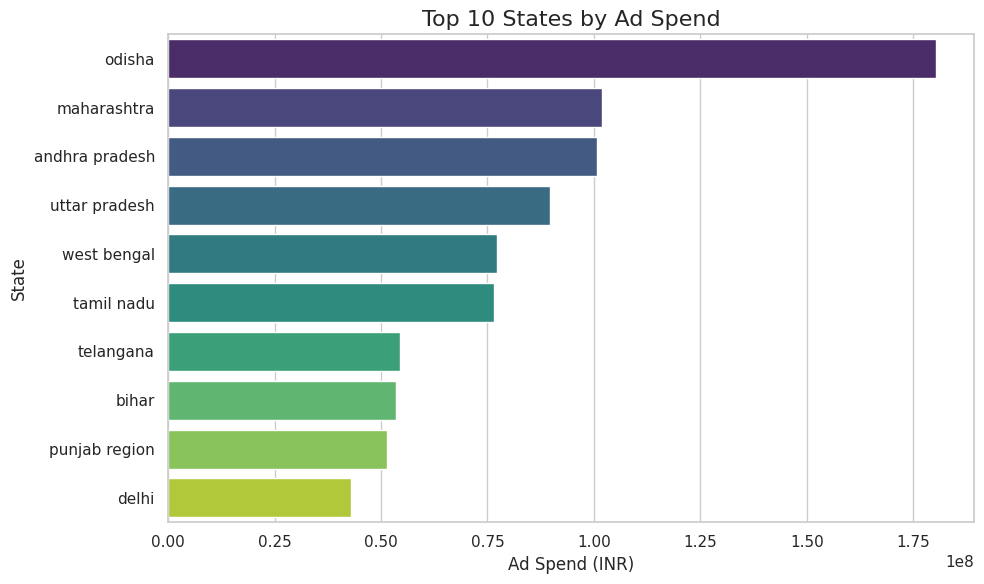

In [16]:
locations.rename(columns={'PC_Name': 'State'}, inplace=True)
state_spend = locations.groupby('State')['Amount spent (INR)'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=state_spend, y='State', x='Amount spent (INR)', palette='viridis')
plt.title("Top 10 States by Ad Spend")
plt.xlabel("Ad Spend (INR)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

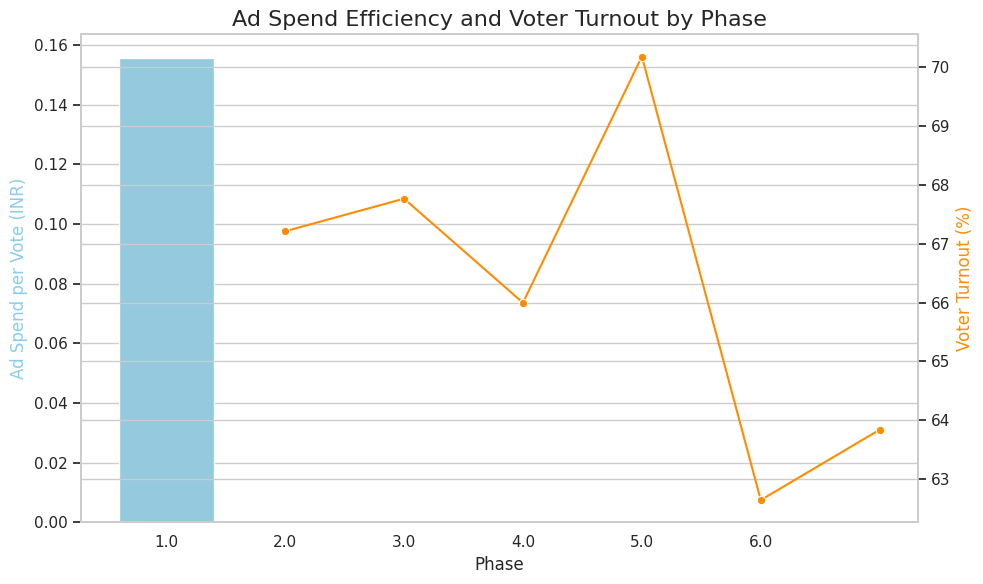

In [17]:
# PHASE-WISE EFFICIENCY ANALYSIS
merged['Ad Spend per Vote'] = merged.apply(lambda row: row['Amount spent (INR)'] / row['Total Votes'] if row['Total Votes'] > 0 else 0, axis=1)
phase_eff = merged.groupby('Phase').agg({
    'Ad Spend per Vote': 'mean',
    'Polled (%)': 'mean'
}).reset_index()

fig, ax1 = plt.subplots()
sns.barplot(x='Phase', y='Ad Spend per Vote', data=phase_eff, color='skyblue', ax=ax1)
ax1.set_ylabel('Ad Spend per Vote (INR)', color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(x='Phase', y='Polled (%)', data=phase_eff, color='darkorange', marker='o', ax=ax2)
ax2.set_ylabel('Voter Turnout (%)', color='darkorange')
plt.title("Ad Spend Efficiency and Voter Turnout by Phase")
fig.tight_layout()
plt.show()

In [18]:
# OUTLIER DETECTION
merged['Ad Spend Z-Score'] = zscore(merged['Amount spent (INR)'].fillna(0))
outliers = merged[merged['Ad Spend Z-Score'].abs() > 3][['PC_Name', 'Amount spent (INR)']]
print("High-Spend Outliers (Z-score > 3):")
display(outliers)

High-Spend Outliers (Z-score > 3):


,PC_Name,Amount spent (INR)
32,puducherry,1535672.0
45,sikkim,4379297.0


In [19]:
# PHASE-WISE ANALYSIS
phase_analysis = merged.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()
print("Phase-wise Spend and Turnout:")
display(phase_analysis)

Phase-wise Spend and Turnout:


,Phase,Amount spent (INR),Polled (%)
0,1.0,7015038.0,67.212549
1,2.0,0.0,67.767273
2,3.0,0.0,65.996022
3,4.0,0.0,70.185521
4,5.0,0.0,62.639184
5,6.0,0.0,63.836724


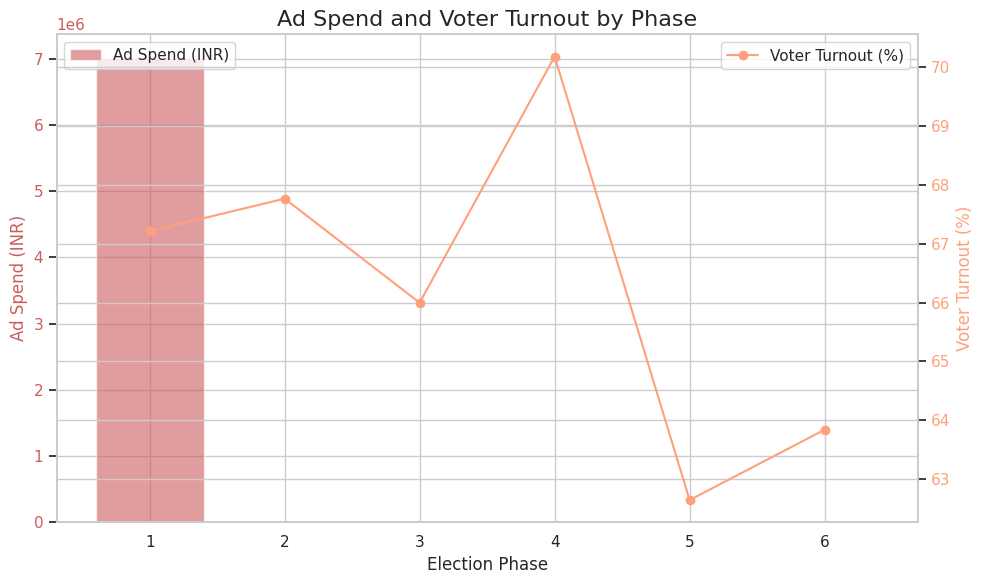

In [20]:
# PLOT PHASE-WISE AD SPEND + VOTER TURNOUT
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
ax1.bar(phase_analysis['Phase'], phase_analysis['Amount spent (INR)'], color='indianred', alpha=0.6, label='Ad Spend (INR)')
ax1.set_xlabel('Election Phase')
ax1.set_ylabel('Ad Spend (INR)', color='indianred')
ax1.tick_params(axis='y', labelcolor='indianred')

ax2 = ax1.twinx()
ax2.plot(phase_analysis['Phase'], phase_analysis['Polled (%)'], color='lightsalmon', marker='o', label='Voter Turnout (%)')
ax2.set_ylabel('Voter Turnout (%)', color='lightsalmon')
ax2.tick_params(axis='y', labelcolor='lightsalmon')

plt.title('Ad Spend and Voter Turnout by Phase')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

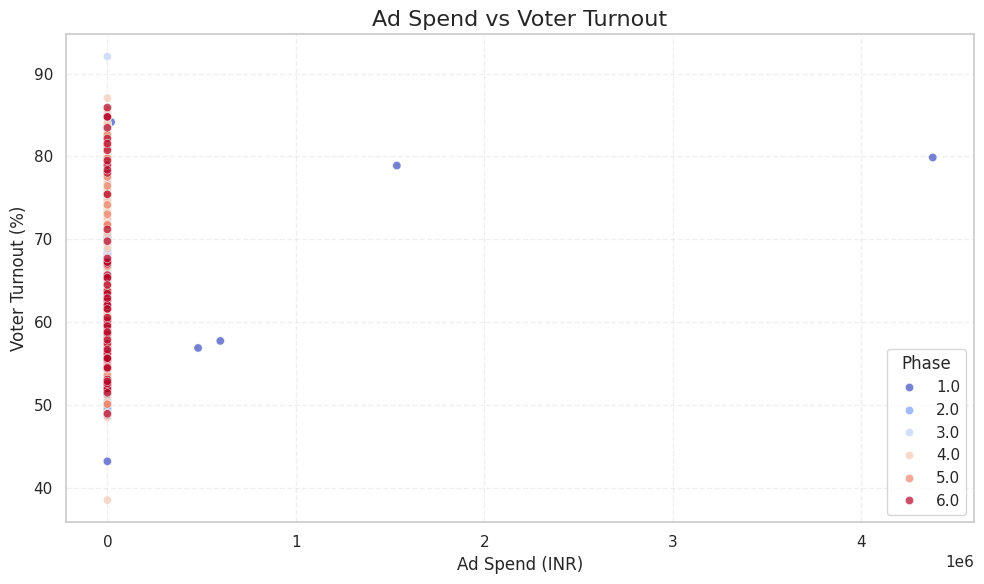

In [21]:
# SCATTER PLOT: AD SPEND VS TURNOUT
sns.scatterplot(data=merged, x='Amount spent (INR)', y='Polled (%)', hue='Phase', palette='coolwarm', alpha=0.7)
plt.title("Ad Spend vs Voter Turnout")
plt.xlabel("Ad Spend (INR)")
plt.ylabel("Voter Turnout (%)")
plt.legend(title="Phase")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# SUMMARY
print(" Summary:")
max_spend_phase = phase_analysis.loc[phase_analysis['Amount spent (INR)'].idxmax(), 'Phase']
max_turnout_phase = phase_analysis.loc[phase_analysis['Polled (%)'].idxmax(), 'Phase']
max_spend_value = phase_analysis['Amount spent (INR)'].max()
max_turnout_value = phase_analysis['Polled (%)'].max()

print(f" Highest ad spend: Phase {max_spend_phase} with ₹{max_spend_value:,.2f}")
print(f" Highest voter turnout: Phase {max_turnout_phase} with {max_turnout_value:.2f}%")


 Summary:
 Highest ad spend: Phase 1.0 with ₹7,015,038.00
 Highest voter turnout: Phase 4.0 with 70.19%
